# All LUAD PTC


In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import anndata
import glob
from scipy import sparse
from scipy.sparse import csr_matrix
from scipy import sparse, io
import scrublet as scr
import scanorama

In [3]:
sc.settings.verbosity = 2        # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

ERROR! Session/line number was not unique in database. History logging moved to new session 315
scanpy==1.7.1 anndata==0.7.5 umap==0.5.0 numpy==1.19.5 scipy==1.6.0 pandas==1.1.4 scikit-learn==0.22 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [ ]:
adata_1476 = sc.read_10x_mtx(
    '../1476-PE-ptc/filtered_feature_bc_matrix',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True) # write a cache file for faster subsequent reading
adata_1476.obs['sample_id'] = ['1476-ptc']*adata_1476.n_obs
adata_1476.var_names_make_unique()
adata_1476.var['mt'] = adata_1476.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_1476, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.filter_cells(adata_1476, max_counts=140000)
sc.pp.filter_cells(adata_1476, min_genes=500)
adata_1476 = adata_1476[adata_1476.obs.pct_counts_mt < 15, :]
sce.pp.scrublet(adata_1476)
sce.pl.scrublet_score_distribution(adata_1476)
adata_1476 = adata_1476[adata_1476.obs.predicted_doublet == False,:]

... reading from cache file cache/..-7734-PE-ptc-filtered_feature_bc_matrix-matrix.h5ad
filtered out 36 cells that have more than 140000 counts
filtered out 49 cells that have less than 300 genes expressed


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


Trying to set attribute `.obs` of view, copying.


Automatically set threshold at doublet score = 0.76
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 11.1%
Elapsed time: 15.5 seconds
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 11.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 11.7%


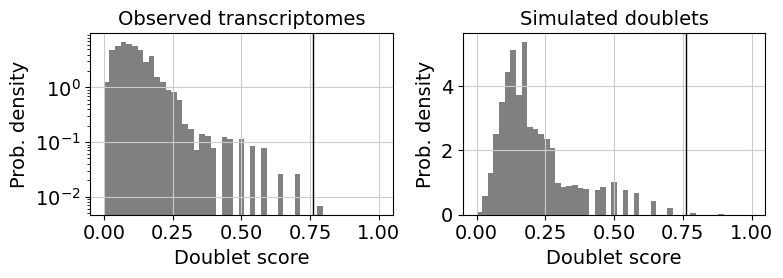

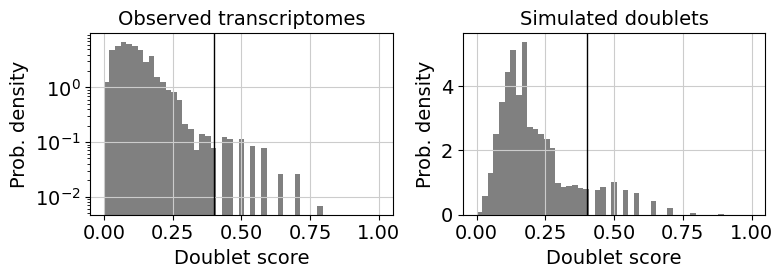

In [4]:
adata_7734 = sc.read_10x_mtx(
    '../7734-PE-ptc/filtered_feature_bc_matrix',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True) # write a cache file for faster subsequent reading
adata_7734.obs['sample_id'] = ['7734-ptc']*adata_7734.n_obs
adata_7734.var_names_make_unique()
adata_7734.var['mt'] = adata_7734.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_7734, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.filter_cells(adata_7734, max_counts=140000)
sc.pp.filter_cells(adata_7734, min_genes=300)
adata_7734 = adata_7734[adata_7734.obs.pct_counts_mt < 10, :]
#sce.pp.scrublet(adata_7734)
#sce.pl.scrublet_score_distribution(adata_7734)
#adata_7734 = adata_7734[adata_7734.obs.predicted_doublet == False,:]
scrub = scr.Scrublet(adata_7734.X)
adata_7734.obs['doublet_score'], adata_7734.obs['predicted_doublet'] = scrub.scrub_doublets()
scrub.plot_histogram()
adata_7734.obs['predicted_doublet'] = scrub.call_doublets(threshold=0.4)
scrub.plot_histogram()
adata_7734 = adata_7734[adata_7734.obs.predicted_doublet == False,:]

... reading from cache file cache/..-3699-PE-ptc-filtered_feature_bc_matrix-matrix.h5ad
filtered out 4 cells that have more than 200000 counts
filtered out 447 cells that have less than 300 genes expressed
Running Scrublet
filtered out 14744 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
/home/yd/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    Scrublet finished (0:00:14)
Trying to set attribute `.obs` of view, copying.


Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.0%


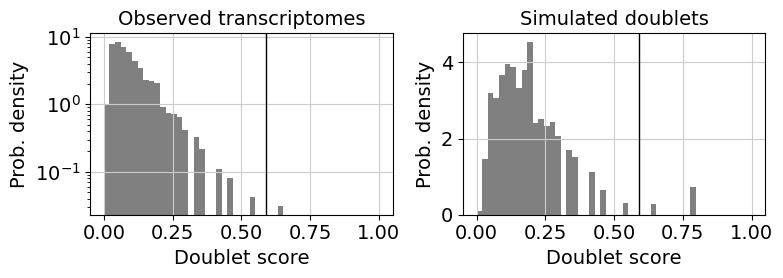

In [5]:
adata_3699 = sc.read_10x_mtx(
    '../3699-PE-ptc/filtered_feature_bc_matrix',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True) # write a cache file for faster subsequent reading
adata_3699.obs['sample_id'] = ['3699-ptc']*adata_3699.n_obs
adata_3699.var_names_make_unique()
adata_3699.var['mt'] = adata_3699.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_3699, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.filter_cells(adata_3699, max_counts=200000)
sc.pp.filter_cells(adata_3699, min_genes=300)
adata_3699 = adata_3699[adata_3699.obs.pct_counts_mt < 10, :]
#scrub = scr.Scrublet(adata_3699.X)
#adata_3699.obs['doublet_score'], adata_3699.obs['predicted_doublet'] = scrub.scrub_doublets()
#scrub.plot_histogram()
#adata_3699.obs['predicted_doublet'] = scrub.call_doublets(threshold=0.4)
#scrub.plot_histogram()
sce.pp.scrublet(adata_3699)
sce.pl.scrublet_score_distribution(adata_3699)
adata_3699 = adata_3699[adata_3699.obs.predicted_doublet == False,:]

... reading from cache file cache/..-0129-PE-ptc-filtered_feature_bc_matrix-matrix.h5ad
filtered out 6 cells that have more than 200000 counts
filtered out 95 cells that have less than 300 genes expressed
Running Scrublet
filtered out 15295 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
/home/yd/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    Scrublet finished (0:00:14)
Trying to set attribute `.obs` of view, copying.


Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 9.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


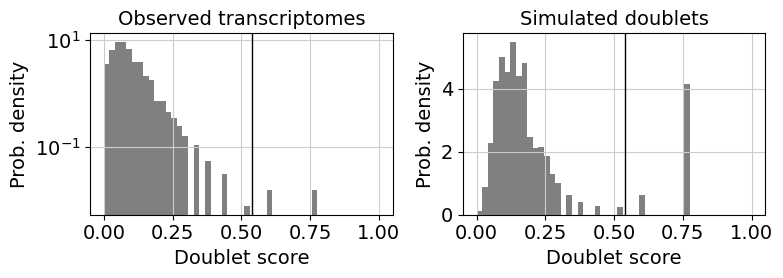

In [6]:
adata_0129 = sc.read_10x_mtx(
    '../0129-PE-ptc/filtered_feature_bc_matrix',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True) # write a cache file for faster subsequent reading
adata_0129.obs['sample_id'] = ['0129-ptc']*adata_0129.n_obs
adata_0129.var_names_make_unique()
adata_0129.var['mt'] = adata_0129.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_0129, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.filter_cells(adata_0129, max_counts=200000)
sc.pp.filter_cells(adata_0129, min_genes=300)
adata_0129 = adata_0129[adata_0129.obs.pct_counts_mt < 15, :]
#scrub = scr.Scrublet(adata_0129.X)
#adata_0129.obs['doublet_score'], adata_0129.obs['predicted_doublet'] = scrub.scrub_doublets()
#scrub.plot_histogram()
#adata_3699.obs['predicted_doublet'] = scrub.call_doublets(threshold=0.4)
#scrub.plot_histogram()
sce.pp.scrublet(adata_0129)
sce.pl.scrublet_score_distribution(adata_0129)
adata_0129 = adata_0129[adata_0129.obs.predicted_doublet == False,:]

... reading from cache file cache/..-XJZ-17-biopsy-ptc-filtered_feature_bc_matrix-matrix.h5ad
filtered out 60 cells that have more than 200000 counts
filtered out 367 cells that have less than 500 genes expressed
Running Scrublet
filtered out 13925 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
/home/yd/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    Scrublet finished (0:00:19)
Trying to set attribute `.obs` of view, copying.


Automatically set threshold at doublet score = 0.23
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 47.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.6%


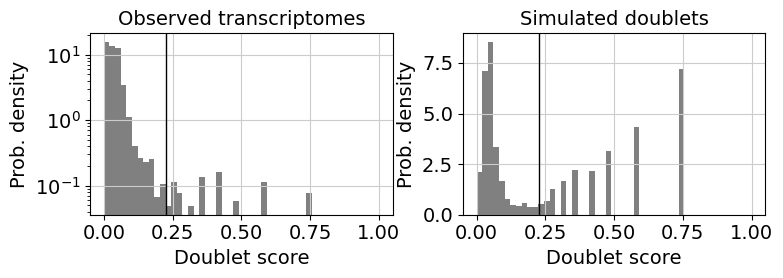

In [7]:
adata_xjz17 = sc.read_10x_mtx(
    '../XJZ-17-biopsy-ptc/filtered_feature_bc_matrix',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True) # write a cache file for faster subsequent reading
adata_xjz17.obs['sample_id'] = ['xjz17-ptc']*adata_xjz17.n_obs
adata_xjz17.var_names_make_unique()
adata_xjz17.var['mt'] = adata_xjz17.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_xjz17, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.filter_cells(adata_xjz17, max_counts=200000)
sc.pp.filter_cells(adata_xjz17, min_genes=500)
adata_xjz17 = adata_xjz17[adata_xjz17.obs.pct_counts_mt < 15, :]
#scrub = scr.Scrublet(adata_0129.X)
#adata_0129.obs['doublet_score'], adata_0129.obs['predicted_doublet'] = scrub.scrub_doublets()
#scrub.plot_histogram()
#adata_3699.obs['predicted_doublet'] = scrub.call_doublets(threshold=0.4)
#scrub.plot_histogram()
sce.pp.scrublet(adata_xjz17)
sce.pl.scrublet_score_distribution(adata_xjz17)
adata_xjz17 = adata_xjz17[adata_xjz17.obs.predicted_doublet == False,:]

... reading from cache file cache/..-3731-NC-ptc-filtered_feature_bc_matrix-matrix.h5ad
filtered out 1 cells that have more than 200000 counts
filtered out 200 cells that have less than 300 genes expressed


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


Trying to set attribute `.obs` of view, copying.


Automatically set threshold at doublet score = 0.35
Detected doublet rate = 4.6%
Estimated detectable doublet fraction = 47.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 9.7%
Elapsed time: 29.6 seconds


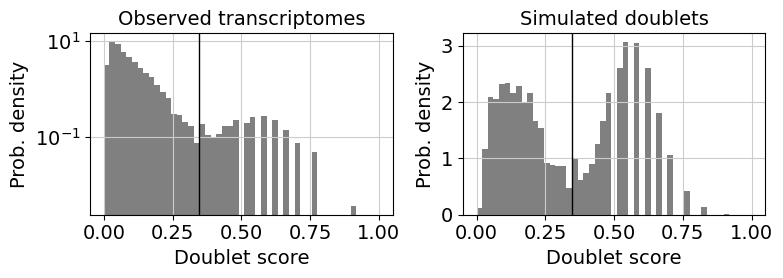

In [8]:
adata_3731 = sc.read_10x_mtx(
    '../3731-NC-ptc/filtered_feature_bc_matrix',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True) # write a cache file for faster subsequent reading
adata_3731.obs['sample_id'] = ['3731-ptc']*adata_3731.n_obs
adata_3731.var_names_make_unique()
adata_3731.var['mt'] = adata_3731.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_3731, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.filter_cells(adata_3731, max_counts=200000)
sc.pp.filter_cells(adata_3731, min_genes=300)
adata_3731 = adata_3731[adata_3731.obs.pct_counts_mt < 15, :]
scrub = scr.Scrublet(adata_3731.X)
adata_3731.obs['doublet_score'], adata_3731.obs['predicted_doublet'] = scrub.scrub_doublets()
scrub.plot_histogram()
#adata_3731.obs['predicted_doublet'] = scrub.call_doublets(threshold=0.4)
#scrub.plot_histogram()
#sce.pp.scrublet(adata_3731)
#sce.pl.scrublet_score_distribution(adata_3731)
adata_3731 = adata_3731[adata_3731.obs.predicted_doublet == False,:]

In [9]:
adata = adata_1476.concatenate(adata_7734,adata_3699,adata_0129,adata_3731,adata_xjz17)
del (adata_1476,adata_7734,adata_3699,adata_0129,adata_3731,adata_xjz17)

In [10]:
sc.pp.filter_genes(adata, min_cells=3)

filtered out 8134 genes that are detected in less than 3 cells
/home/yd/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


## Preprocessing

Show those genes that yield the highest fraction of counts in each single cell, across all cells.

Basic filtering:

... storing 'sample_id' as categorical
... storing 'feature_types' as categorical


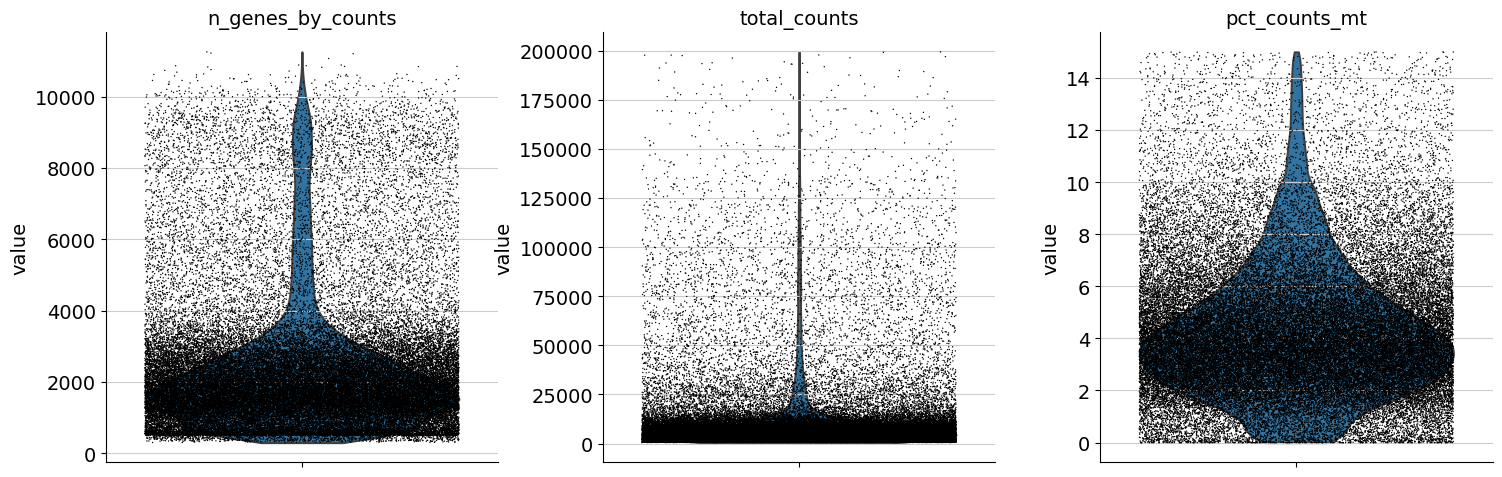

In [14]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

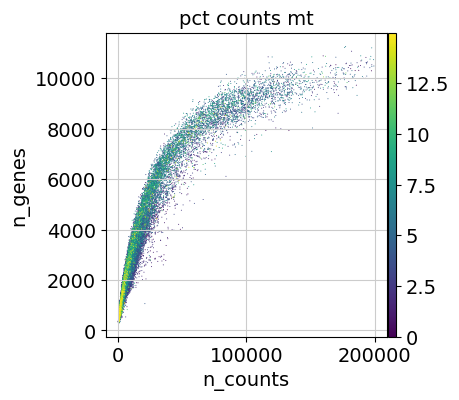

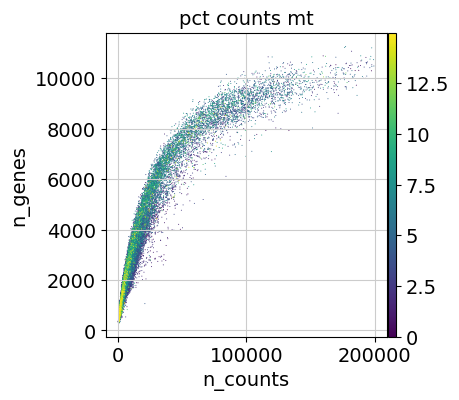

In [15]:
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='pct_counts_mt')
p2 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='pct_counts_mt')

Remove cells that have too many mitochondrial genes expressed or too many total counts:

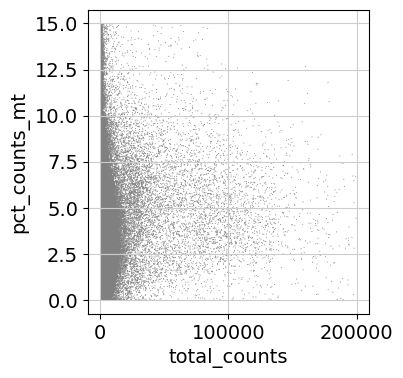

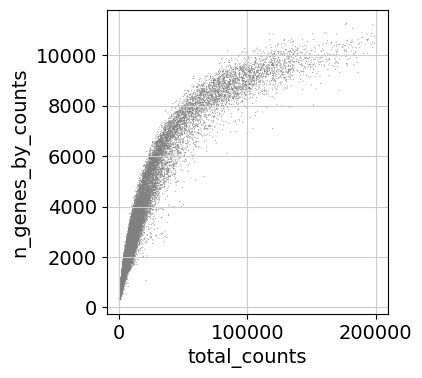

In [16]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

Actually do the filtering by slicing the `AnnData` object.

In [11]:
cell_cycle_genes = [x.strip() for x in open('../regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

In [12]:
# save normalized counts in raw slot.
adata.raw = adata
# normalize to depth 10 000
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
# logaritmize
sc.pp.log1p(adata)
# scale
sc.pp.scale(adata)

normalizing by total count per cell
    finished (0:00:02): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [13]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished (0:00:02)
computing score 'G2M_score'
    finished (0:00:02)


... storing 'sample_id' as categorical
... storing 'phase' as categorical
... storing 'feature_types' as categorical


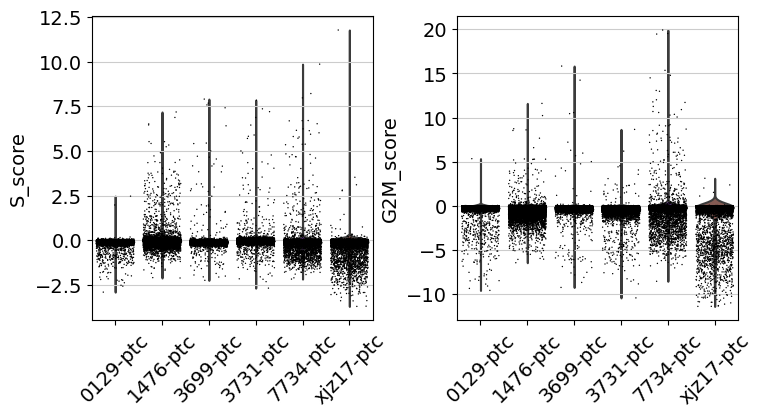

In [14]:
sc.pl.violin(adata, ['S_score', 'G2M_score'],
             jitter=0.4, groupby = 'sample_id', rotation=45)

In [22]:
adata = adata.raw.to_adata() 

In [6]:
#import os
#os.makedirs('./results/', exist_ok=True)
#
#save_file = './/results/scanpy_qc_filtered_allLuadPTC.h5ad'
#adata.write_h5ad(save_file)

In [4]:
adata = sc.read_h5ad('./results/scanpy_qc_filtered_allLuadPTC.h5ad')

## dim reduction

In [5]:
# normalize to depth 10 000
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

# logaritmize
sc.pp.log1p(adata)


# store normalized counts in the raw slot, 
# we will subset adata.X for variable genes, but want to keep all genes matrix as well.
adata.raw = adata

normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [6]:
# compute variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
print("Highly variable genes: %d"%sum(adata.var.highly_variable))

# subset for variable genes in the dataset
adata = adata[:, adata.var['highly_variable']]

extracting highly variable genes
    finished (0:00:03)


Highly variable genes: 2593


Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Also cell cycle genes. Scale the data to unit variance.

In [7]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt','S_score','G2M_score'])
# scale data, clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use
    finished (0:01:40)


In [8]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:13)


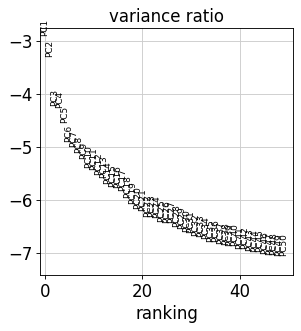

In [45]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [12]:
#sc.pp.neighbors(adata, n_pcs = 30, n_neighbors = 20)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:15)


In [13]:
#sc.tl.umap(adata)

computing UMAP
    finished (0:00:44)


# Integrate with Harmoney

In [14]:
sc.settings.set_figure_params(dpi=500, facecolor='white')

In [17]:
adata

AnnData object with n_obs × n_vars = 58425 × 2593
    obs: 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'S_score', 'G2M_score', 'phase', 'leiden_0.6', 'major_clusters'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells_by_counts-4', 'mean_counts-4', 'pct_dropout_by_counts-4', 'total_counts-4', 'n_cells_by_counts-5', 'mean_counts-5', 'pct_dropout_by_counts-5', 'total_counts-5', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_0.6_colors', 'major_clusters_colors', 'neighb

In [9]:
sce.pp.harmony_integrate(adata, 'batch')

2021-05-07 16:32:07,724 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2021-05-07 16:32:35,342 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2021-05-07 16:32:58,893 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2021-05-07 16:33:21,948 - harmonypy - INFO - Converged after 3 iterations
INFO:harmonypy:Converged after 3 iterations


In [10]:
sc.pp.neighbors(adata,use_rep='X_pca_harmony',n_pcs=50,n_neighbors=20)

computing neighbors
    finished (0:00:16)


In [11]:
sc.tl.umap(adata)

computing UMAP
    finished (0:00:38)


## Clustering the neighborhood graph

As with Seurat and many other frameworks, we recommend the Leiden graph-clustering method (community detection based on optimizing modularity) by [Traag *et al.* (2018)](https://scanpy.readthedocs.io/en/latest/references.html#traag18). Note that Leiden clustering directly clusters the neighborhood graph of cells, which we already computed in the previous section.

In [12]:
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")

running Leiden clustering
    finished (0:00:12)


In [13]:
sc.tl.leiden(adata, resolution = 0.77, key_added = "leiden_0.77")

running Leiden clustering
    finished (0:00:36)


In [14]:
sc.tl.leiden(adata, resolution = 1.1, key_added = "leiden_1.1")
sc.tl.leiden(adata, resolution = 1.2, key_added = "leiden_1.2")
sc.tl.leiden(adata, resolution = 1.3, key_added = "leiden_1.3")

running Leiden clustering
    finished (0:00:20)
running Leiden clustering
    finished (0:00:12)
running Leiden clustering
    finished (0:00:15)


In [15]:
sc.tl.leiden(adata, resolution = 1.4, key_added = "leiden_1.4")

running Leiden clustering
    finished (0:00:18)


In [16]:
sc.tl.leiden(adata, resolution = 1.35, key_added = "leiden_1.35")

running Leiden clustering
    finished (0:00:13)


## Finding marker genes

Let us compute a ranking for the highly differential genes in each cluster. For this, by default, the `.raw` attribute of AnnData is used in case it has been initialized before. The simplest and fastest method to do so is the t-test.

In [69]:
sc.settings.verbosity = 2  # reduce the verbosity

In [17]:
sc.tl.rank_genes_groups(adata, 'leiden_1.3', method='wilcoxon',key_added='wilcoxon_leiden_1.3',pts=True)
#sc.tl.filter_rank_genes_groups(adata,min_in_group_fraction=0.5,min_fold_change=2,key_added='wilcoxon_leiden_0.6.filtered',key='wilcoxon_leiden_0.6')

ranking genes
    finished (0:03:15)


In [86]:
markerGenes = sc.get.rank_genes_groups_df(adata,group =None,key='wilcoxon_leiden_1.3', pval_cutoff=0.01, log2fc_min=1)
markerGenes.to_excel('./markers_1,3_harmony.xlsx',index=False)

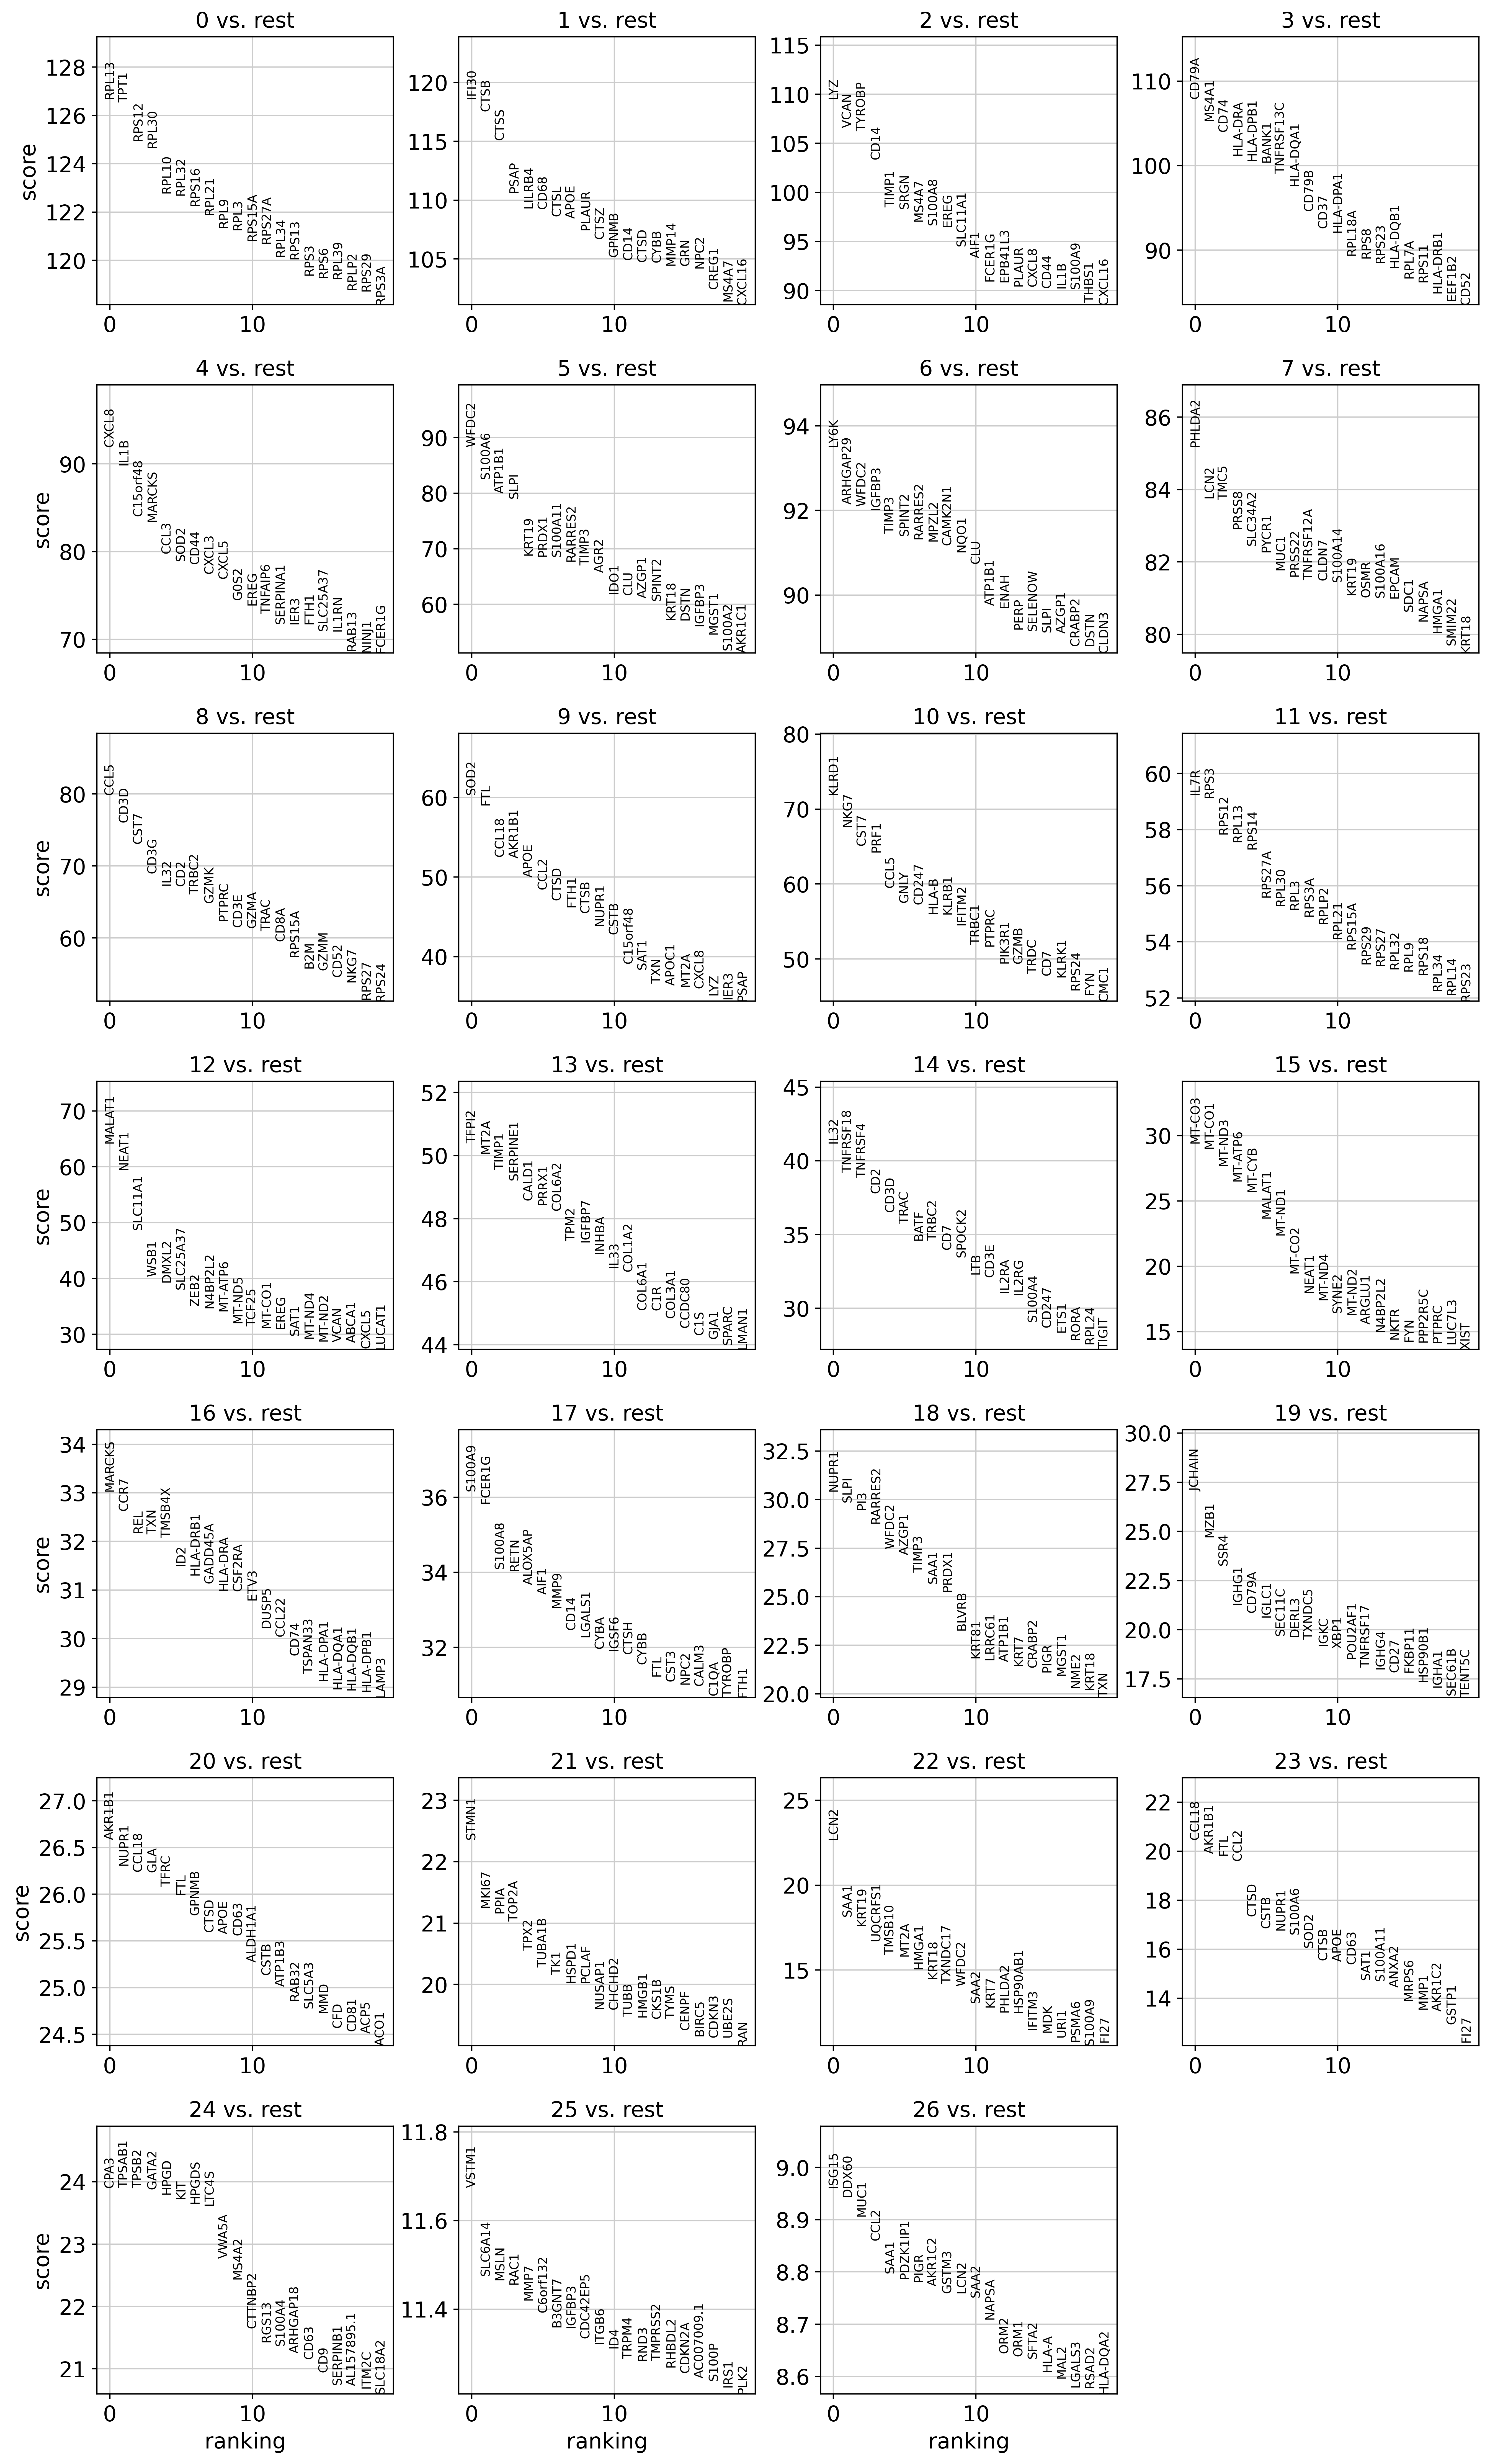

In [87]:
sc.pl.rank_genes_groups(adata,key='wilcoxon_leiden_1.3',sharey=False)

If we want a more detailed view for a certain group, use `sc.pl.rank_genes_groups_violin`.

Actually mark the cell types.

In [18]:
old_to_new = {
    '0':'T cell',
    '1':'Mo/Mac',
    '2':'Mo/Mac',
    '3':'B cell',
    '4':'Mo/Mac',
    '5':'Epithelial cell',
    '6':'Epithelial cell',
    '7':'Epithelial cell',
    '8':'T cell',
    '9':'Mo/Mac',
    '10':'NK cell',
    '11':'T cell',
    '12':'Mo/Mac',
    '13':'Fibroblast',
    '14':'T cell',
    '15':'Stressed',
    '16':'Dendritic cell',
    '17':'Mo/Mac',
    '18':'Epithelial cell',
    '19':'B cell',
    '20':'Mo/Mac',
    '21':'Epithelial cell',
    '22':'Epithelial cell',
    '23':'Mo/Mac',
    '24':'Mast cell',
    '25':'Epithelial cell',
    '26':'Epithelial cell'
}
adata.obs['major_clusters'] = (
    adata.obs['leiden_1.3']
    .map(old_to_new)
    .astype('category')
)

In [19]:
adata = adata[adata.obs['major_clusters']!='Stressed',:]
adata.shape

(58263, 2593)

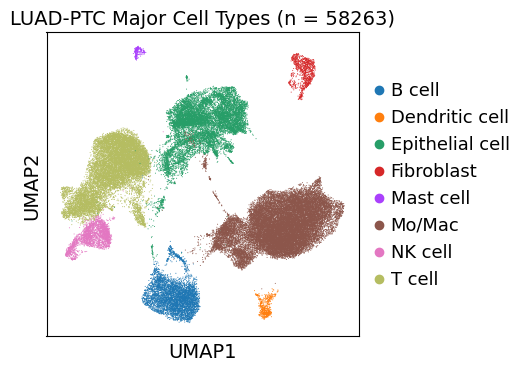

In [22]:
sc.pl.umap(adata,color = ['major_clusters'],title="LUAD-PTC Major Cell Types (n = 58263)")

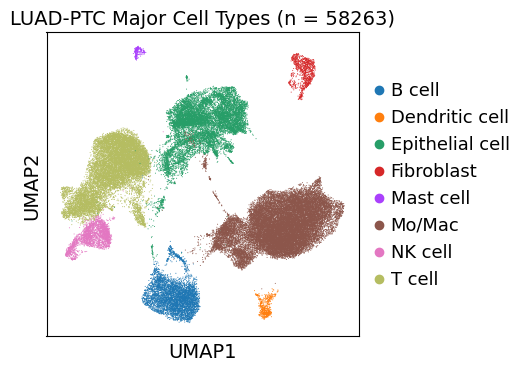

In [4]:
sc.pl.umap(adata,color = ['major_clusters'],title="LUAD-PTC Major Cell Types (n = 58263)")

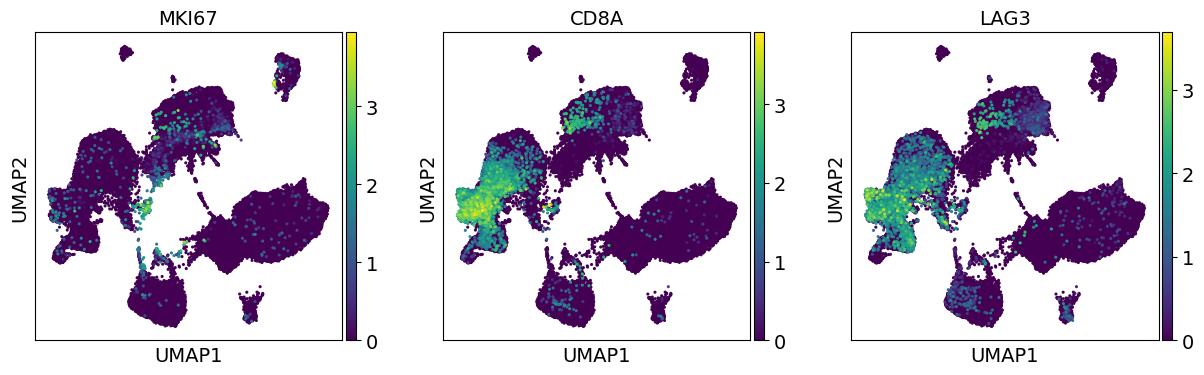

In [35]:
sc.pl.umap(adata,color=['MKI67','CD8A','LAG3'],size=20)

In [11]:
adata.obs.major_clusters.cat.categories

Index(['B cell', 'Dendritic cell', 'Epithelial cell', 'Fibroblast',
       'Mast cell', 'Mo/Mac', 'NK cell', 'T cell'],
      dtype='object')

In [7]:
adata.uns['major_clusters_colors']

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61'], dtype=object)

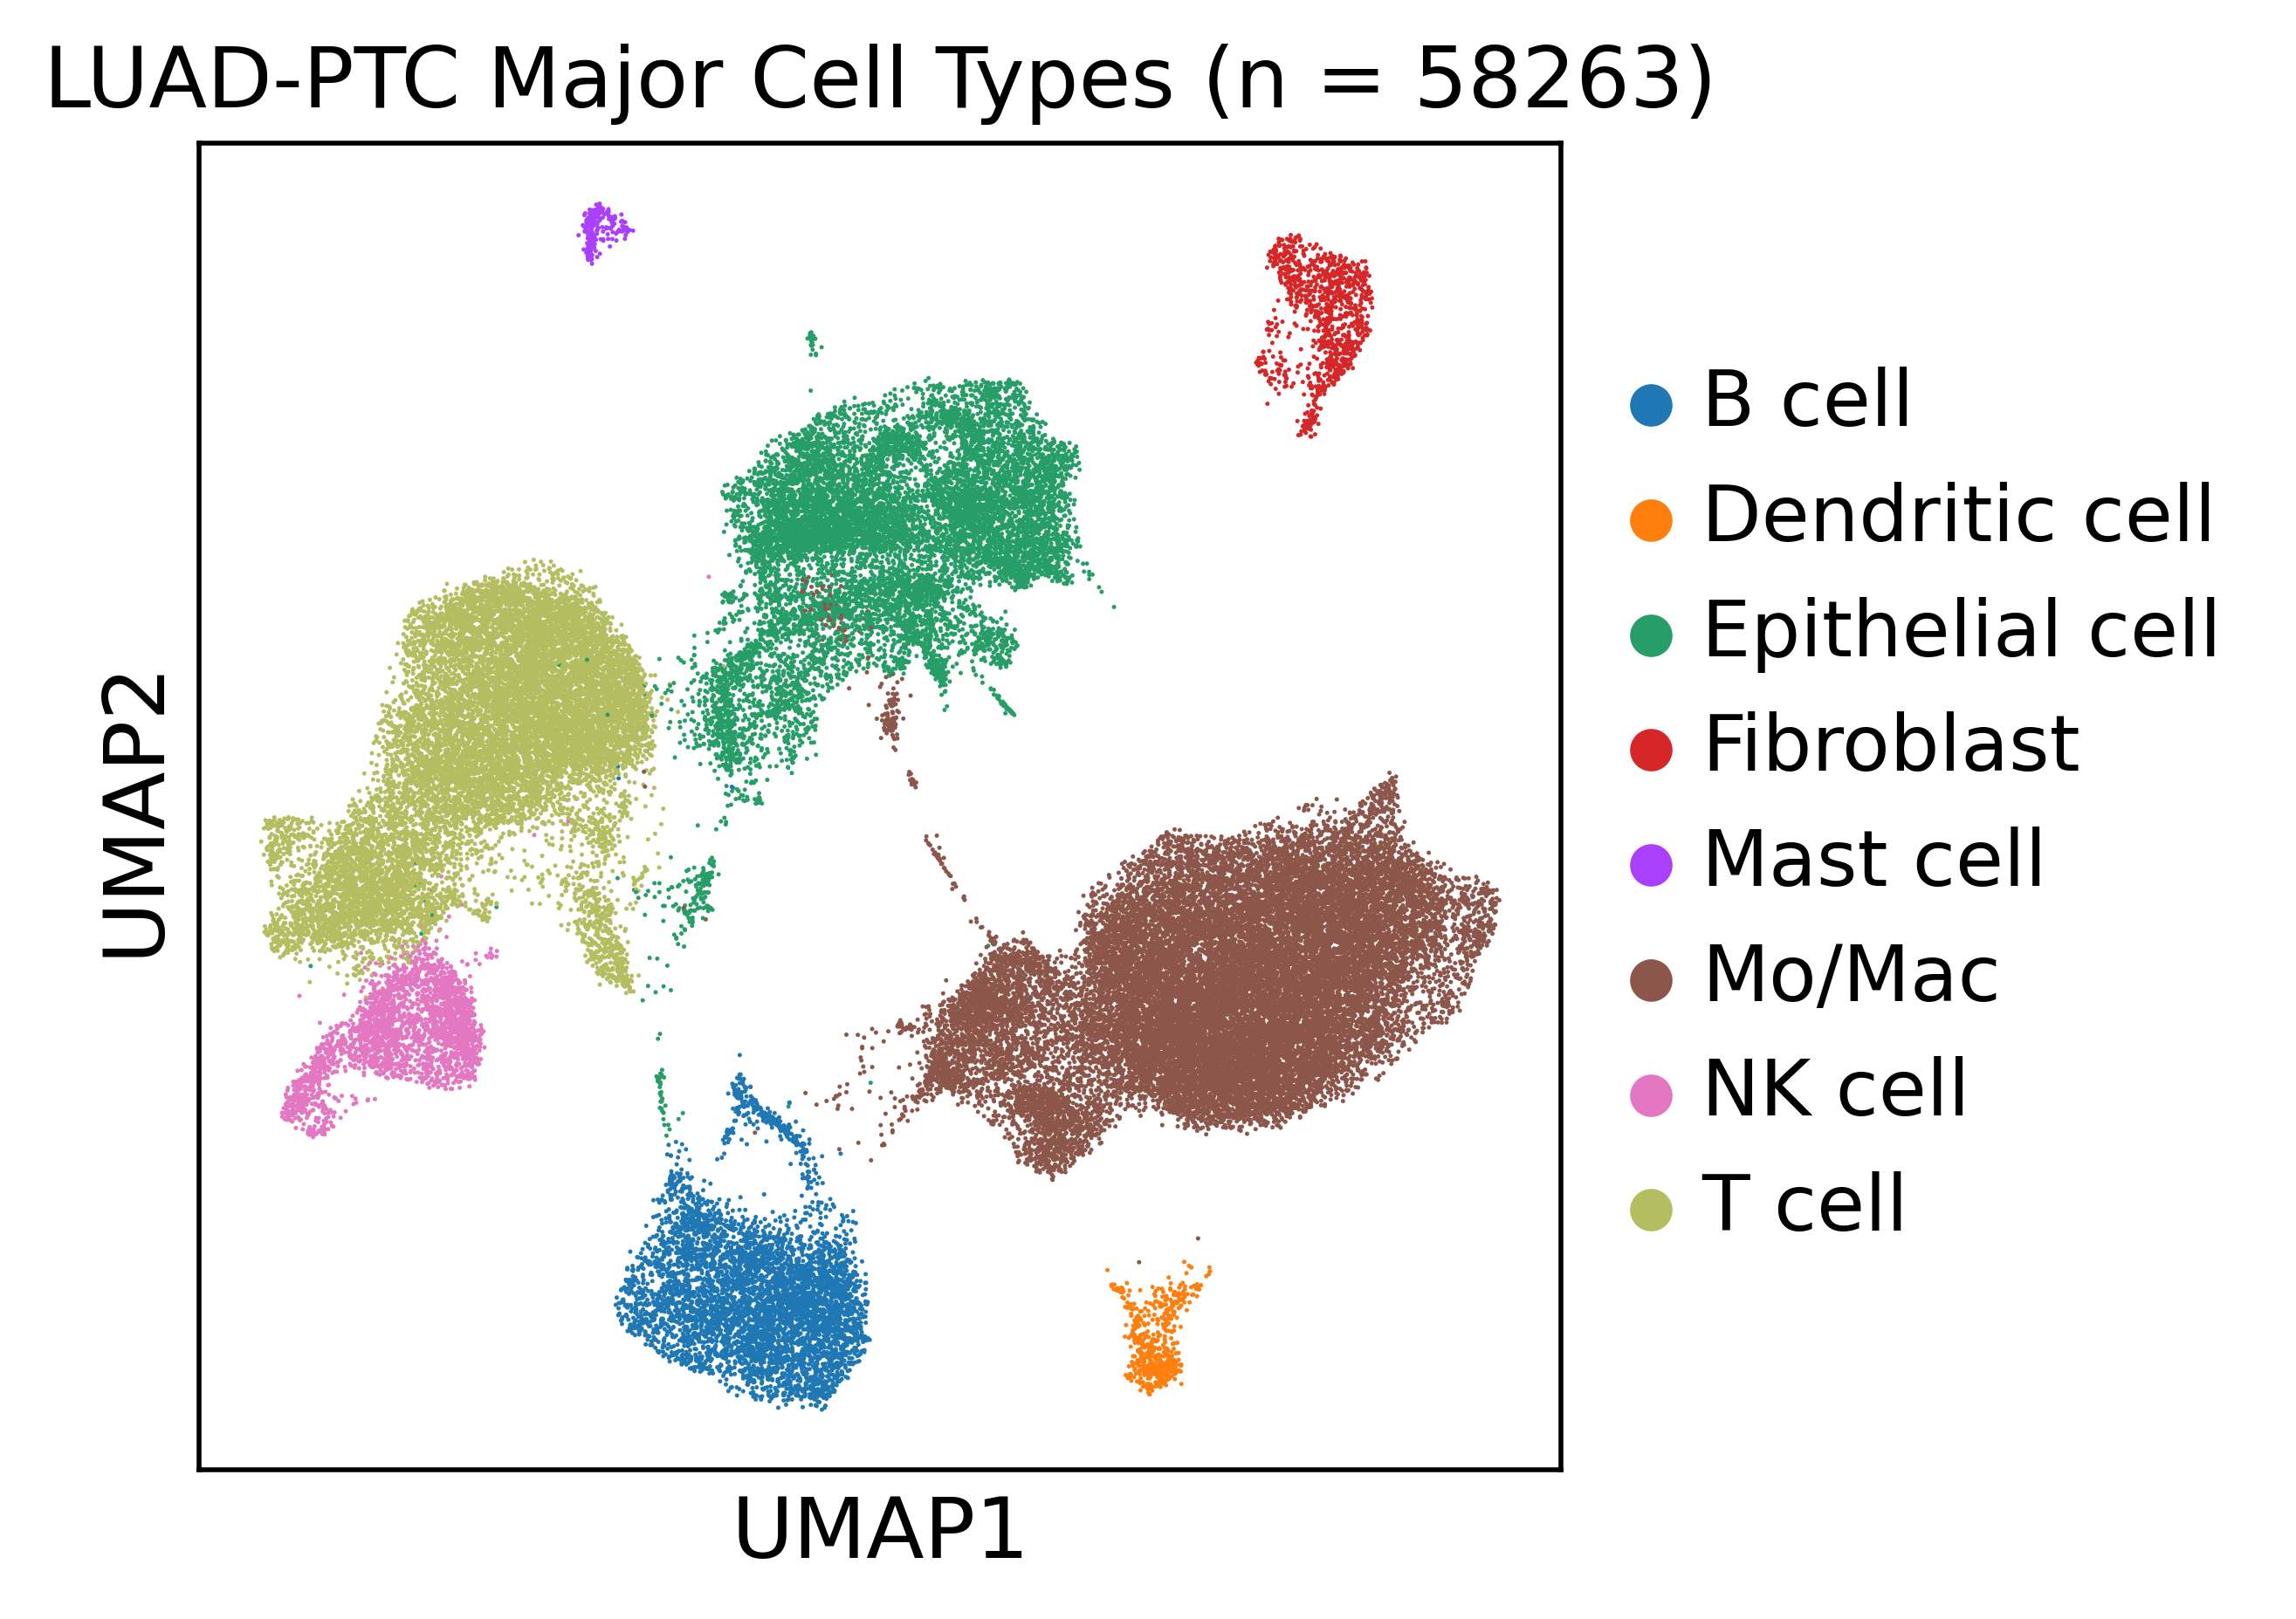

In [94]:
sc.settings.set_figure_params(dpi_save=600, facecolor='white',dpi=500)
sc.pl.umap(adata,color = ['major_clusters'],title="LUAD-PTC Major Cell Types (n = 58263)",save='LUAD_allPTCs.png')

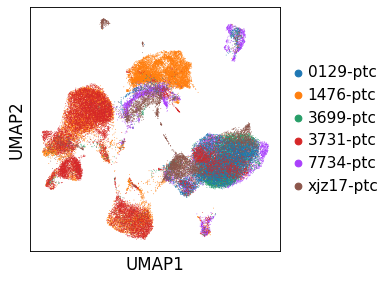

In [85]:
sc.pl.umap(adata,color = ['sample_id'],title='',save='LUAD_allPTCs_splitsample.png')

In [21]:
sc.tl.rank_genes_groups(adata, 'major_clusters', method='wilcoxon',key_added='major_celltype_markers',pts=True)
#sc.tl.filter_rank_genes_groups(adata,min_in_group_fraction=0.5,min_fold_change=2,key_added='major_celltype_markers.filtered',key='major_celltype_markers')

ranking genes
    finished (0:02:32)


In [21]:
sc.pl.rank_genes_groups(adata, key='major_celltype_markers',sharey=False)

KeyError: 'major_celltype_markers'

In [23]:
markerGenes = sc.get.rank_genes_groups_df(adata,group =None,key='major_celltype_markers', pval_cutoff=0.01, log2fc_min=1)
markerGenes.to_excel('./markers_majorcell_harmony.xlsx',index=False)

In [23]:
save_file = './results/scanpy_Harmony_allLuadPTC.h5ad'
adata.write_h5ad(save_file)

In [130]:
adata = sc.read_h5ad('./results/scanpy_Harmony_allLuadPTC.h5ad')

In [142]:
adata = adata.raw.to_adata()
adata.layers["scaled_counts"] = sc.pp.scale(adata.X)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [121]:
marker_dic ={"Epithelial cell":['EPCAM','KRT19','KRT18','SLPI','WFDC2'],
      "B cell": ['CD79A','MS4A1','BANK1','TNFRSF13C','IGHA1'],
      "Dendritic cell": ['CCR7','CCL22','CSF2RA','LAMP3','GADD45A'],
      "Fibroblast": ['TFPI2','SERPINE1','CALD1','PRRX1','COL6A2'],
      "Mast cell": ['KIT','CPA3','TPSB2','MS4A2','GATA2'],
      "Mo/Mac" : ['CD14','LYZ','CD68','CTSB','FCGR3A'],
      "T cell": ['CD3D','CD3E','CD3G','TRAC','CD2']}
sc.settings.set_figure_params(dpi_save=600, facecolor='white',fontsize=15)
#sc.pl.dotplot(adata,var_names=marker_dic,groupby='major_clusters',vmin=-2,vmax=2,cmap = "RdYlBu_r",log=True,layer='scaled_counts',
#             save='majorCellTypeMarkers.png')

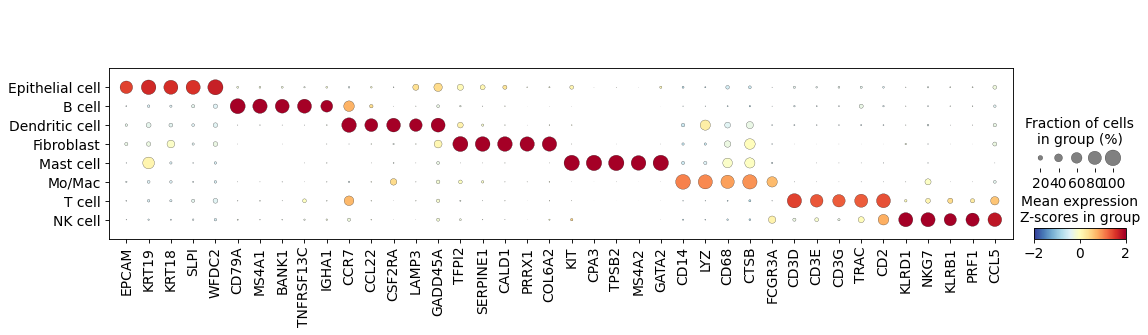

In [145]:
marker_dic =['EPCAM','KRT19','KRT18','SLPI','WFDC2',
       'CD79A','MS4A1','BANK1','TNFRSF13C','IGHA1',
      'CCR7','CCL22','CSF2RA','LAMP3','GADD45A',
    'TFPI2','SERPINE1','CALD1','PRRX1','COL6A2',
   'KIT','CPA3','TPSB2','MS4A2','GATA2',
    'CD14','LYZ','CD68','CTSB','FCGR3A',
   'CD3D','CD3E','CD3G','TRAC','CD2',
    'KLRD1','NKG7','KLRB1','PRF1','CCL5']
sc.settings.set_figure_params(dpi_save=600, facecolor='white',fontsize=15)
sc.pl.dotplot(adata,var_names=marker_dic,groupby='major_clusters',vmin=-2,vmax=2,cmap = "RdYlBu_r",log=False,layer='scaled_counts',
             categories_order=['Epithelial cell','B cell','Dendritic cell','Fibroblast','Mast cell','Mo/Mac','T cell','NK cell'],
              colorbar_title ='Mean expression\nZ-scores in group',save='majorCellTypeMarkers.png')

In [146]:
save_file = './results/scanpy_Harmony_allLuadPTC.h5ad'
adata.write_h5ad(save_file)

# # Subset T cell

In [3]:
adata = sc.read_h5ad('./results/scanpy_Harmony_allLuadPTC.h5ad')

# FIND VARIABLE GENES AGAIN

In [4]:
tmp = adata[adata.obs['major_clusters'] == 'T cell',:]
tcell=sc.AnnData(tmp.X,obs=tmp.obs,var=tmp.var)
del tmp
tcell.raw = tcell

/home/yd/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [5]:
gene1 = 'EPCAM'
gene2 = 'CD14'
tcell.obs['EPCAM_expression'] = tcell.raw[:,'{}'.format(gene1)].X.todense() > 0
tcell.obs['CD14_expression'] = tcell.raw[:,'{}'.format(gene2)].X.todense() > 0

In [6]:
tcell = tcell[tcell.obs['EPCAM_expression']==False,:]
tcell = tcell[tcell.obs['CD14_expression']==False,:]

/home/yd/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/yd/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [13]:
tcell.shape

(12407, 28467)

In [8]:
# compute variable genes
sc.pp.highly_variable_genes(tcell, min_mean=0.0125, max_mean=3, min_disp=0.5)
print("Highly variable genes: %d"%sum(tcell.var.highly_variable))

# subset for variable genes in the dataset
tcell = tcell[:, tcell.var['highly_variable']]
#sc.pp.regress_out(tcell, ['total_counts', 'pct_counts_mt'])

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.


Highly variable genes: 2303


In [9]:
sc.pp.regress_out(tcell, ['total_counts', 'pct_counts_mt','S_score','G2M_score'])
# scale data, clip values exceeding standard deviation 10.
sc.pp.scale(tcell, max_value=10)

regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use
    finished (0:00:21)


computing PCA
    on highly variable genes
/home/yd/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
    with n_comps=50
    finished (0:00:08)


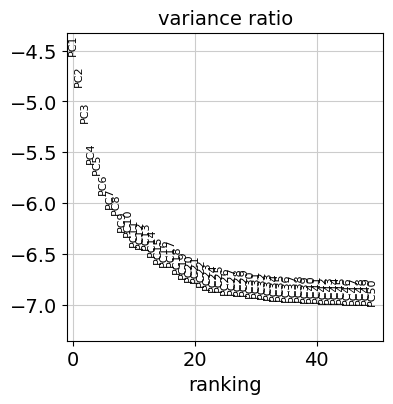

In [10]:
sc.tl.pca(tcell, svd_solver='arpack')
sc.pl.pca_variance_ratio(tcell, log=True, n_pcs = 50)

In [11]:
sce.pp.harmony_integrate(tcell, 'batch',max_iter_harmony=50)

KeyboardInterrupt: 

In [16]:
sc.pp.neighbors(tcell,use_rep='X_pca_harmony',n_pcs=50,n_neighbors=20)

computing neighbors
    finished (0:00:11)


In [17]:
sc.tl.umap(tcell)

computing UMAP
    finished (0:00:07)


In [18]:
sc.tl.leiden(tcell, resolution = 0.4, key_added = "leiden_0.4")
sc.tl.leiden(tcell, resolution = 0.5, key_added = "leiden_0.5")
sc.tl.leiden(tcell, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(tcell, resolution = 0.7, key_added = "leiden_0.7")
sc.tl.leiden(tcell, resolution = 0.8, key_added = "leiden_0.8")
sc.tl.leiden(tcell, resolution = 0.9, key_added = "leiden_0.9")
sc.tl.leiden(tcell, resolution = 1, key_added = "leiden_1")
sc.tl.leiden(tcell, resolution = 1.1, key_added = "leiden_1.1")
sc.tl.leiden(tcell, resolution = 1.2, key_added = "leiden_1.2")
sc.tl.leiden(tcell, resolution = 1.3, key_added = "leiden_1.3")
sc.tl.leiden(tcell, resolution = 1.4, key_added = "leiden_1.4")
sc.tl.leiden(tcell, resolution = 1.5, key_added = "leiden_1.5")
sc.tl.leiden(tcell, resolution = 1.6, key_added = "leiden_1.6")

running Leiden clustering
    finished (0:00:01)
running Leiden clustering
    finished (0:00:01)
running Leiden clustering
    finished (0:00:01)
running Leiden clustering
    finished (0:00:01)
running Leiden clustering
    finished (0:00:01)
running Leiden clustering
    finished (0:00:01)
running Leiden clustering
    finished (0:00:01)
running Leiden clustering
    finished (0:00:01)
running Leiden clustering
    finished (0:00:02)
running Leiden clustering
    finished (0:00:01)
running Leiden clustering
    finished (0:00:01)
running Leiden clustering
    finished (0:00:02)
running Leiden clustering
    finished (0:00:01)


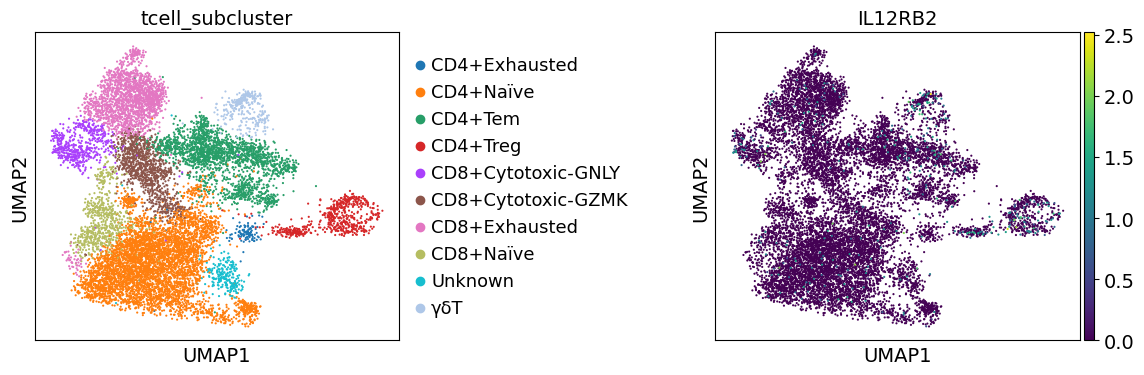

In [14]:
sc.pl.umap(tcell,color=['tcell_subcluster','IL12RB2'],use_raw=False,wspace=0.7)

In [20]:
sc.tl.rank_genes_groups(tcell,groupby='leiden_1.2',pts=True,method='wilcoxon')

ranking genes
    finished (0:00:24)


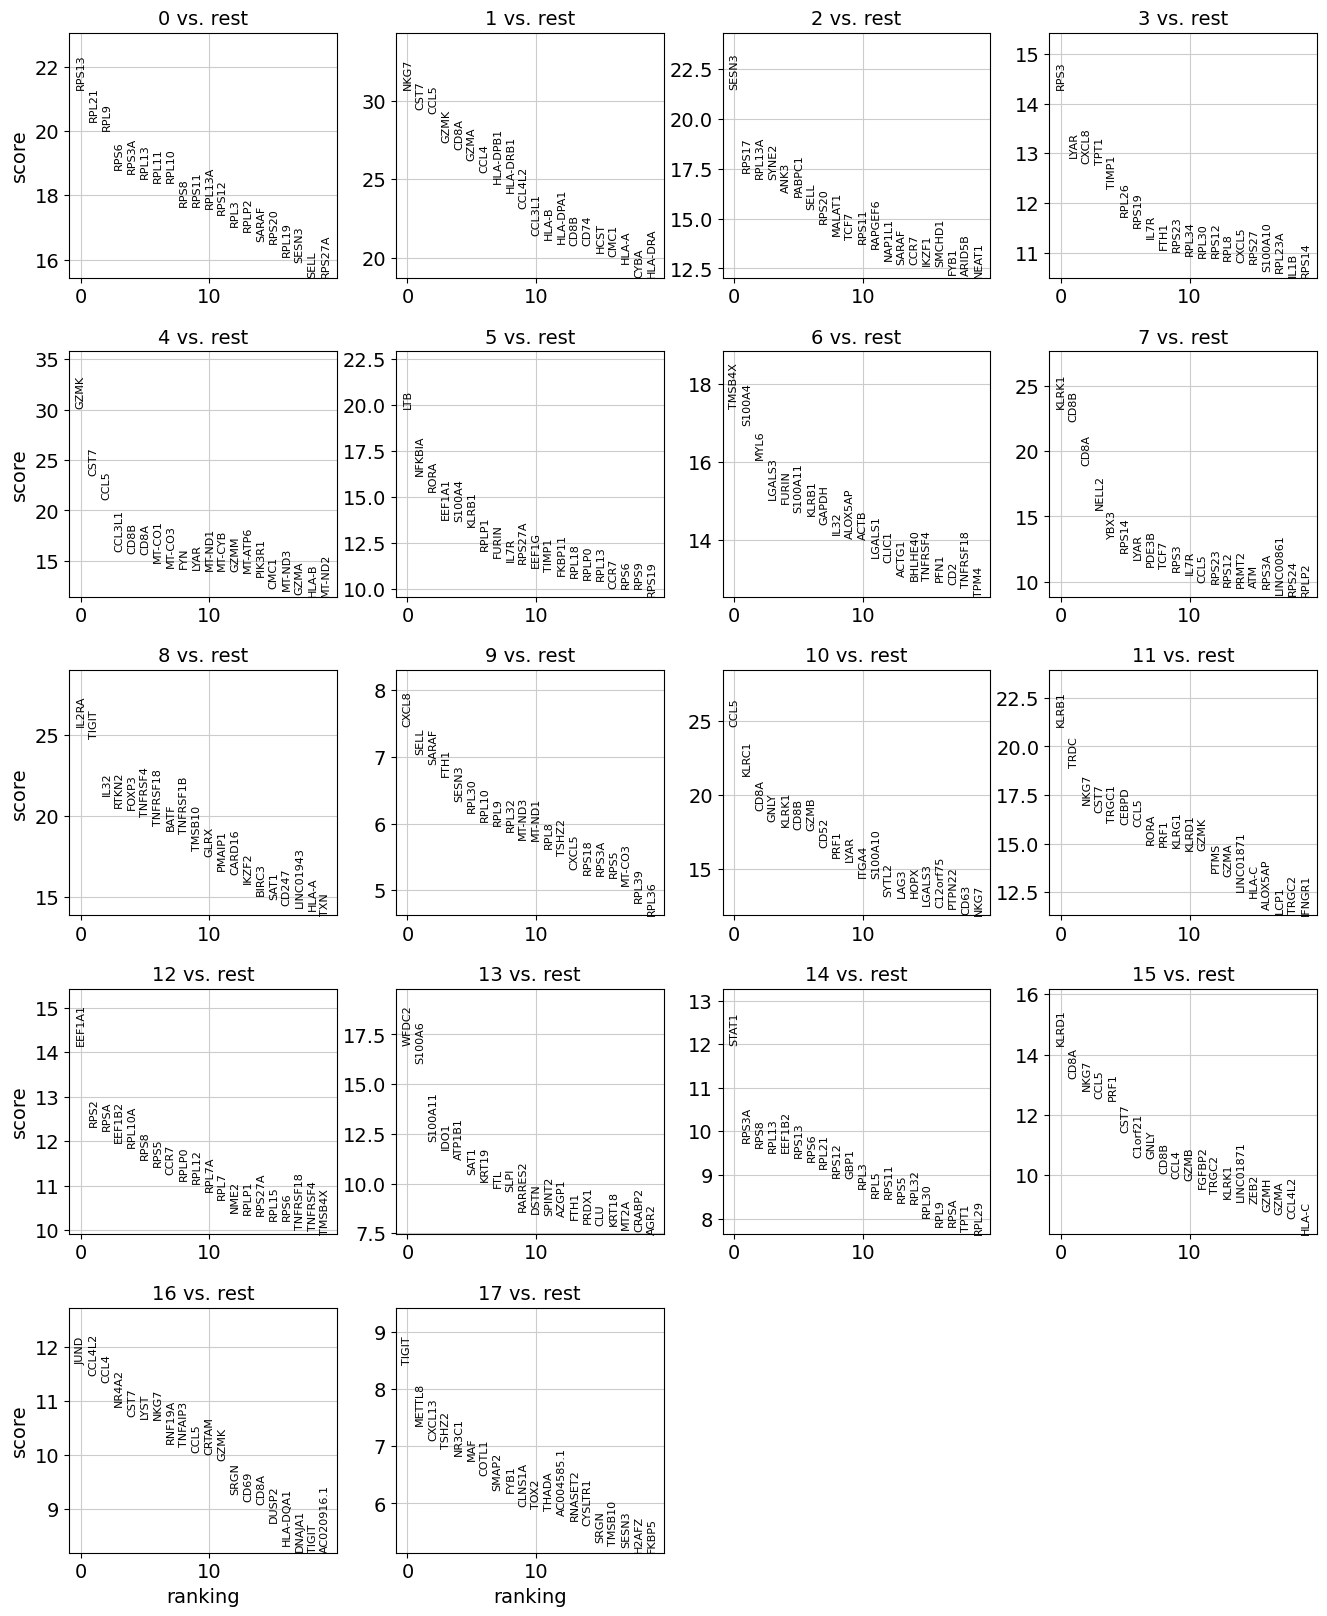

In [21]:
sc.pl.rank_genes_groups(tcell,sharey=False)

In [15]:
old_to_new = {
    '0':'CD4+Naïve',
    '1':'CD8+Exhausted',
    '2':'CD4+Naïve',
    '3':'CD4+Tem',
    '4':'CD8+Cytotoxic-GZMK',
    '5':'CD4+Naïve',
    '6':'CD4+Tem',
    '7':'CD8+Naïve',
    '8':'CD4+Treg',
    '9':'CD4+Naïve',
    '10':'CD8+Cytotoxic-GNLY',
    '11':'γδT',
    '12':'CD4+Naïve',
    '13':'Unknown',
    '14':'CD4+Naïve',
    '15':'CD8+Cytotoxic-GNLY',
    '16':'CD8+Exhausted',
    '17':'CD4+Exhausted'
}
tcell.obs['tcell_subcluster'] = (
    tcell.obs['leiden_1.2']
    .map(old_to_new)
    .astype('category')
)

In [18]:
tcell = tcell[tcell.obs['tcell_subcluster']!='Unknown',:]

/home/yd/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [23]:
markerGenes = sc.get.rank_genes_groups_df(tcell,group =None, pval_cutoff=0.01,log2fc_min=1)
markerGenes.to_excel('./markers_leiden_1.2_tcell.xlsx',index=False)

In [24]:
tcell = tcell.raw.to_adata()

In [25]:
tcell.layers["scaled_counts"] = sc.pp.scale(tcell.X)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [19]:
sc.tl.rank_genes_groups(tcell, groupby='tcell_subcluster',pts=True,method='wilcoxon')

ranking genes
Trying to set attribute `.uns` of view, copying.
    finished (0:00:22)


In [20]:
markerGenes = sc.get.rank_genes_groups_df(tcell,group =None,key='rank_genes_groups', pval_cutoff=0.05)
markerGenes.to_excel('./tcell_finalmarker.xlsx')

# # Visualization

In [666]:
#res = pd.DataFrame(columns=tcell.var_names, index=tcell.obs['tcell_subcluster'].cat.categories)                                                                                                 

#for clust in tcell.obs['tcell_subcluster'].cat.categories: 
#   res.loc[clust] = tcell[tcell.obs['tcell_subcluster'].isin([clust]),:].layers["scaled_counts"].mean(0)
#res = res.T

/home/yd/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [29]:
functional_features= {'Naïve markers':['TCF7','SELL','LEF1','CCR7'],
                       'Inhibitory receptors':['LAG3','TIGIT','PDCD1','CTLA4'],
                       'Effector molecules':['GZMA','GNLY','PRF1','GZMB','GZMK','IFNG','NKG7'],
                       'γδT receptors':['TRDC','TRGC1','TRGC2'],
                      'Tem markers':['IL7R','TIMP1','TNFSF13B'],
                       'Co-stimulatory molecules':['CD28','TNFRSF4','TNFRSF18','ICOS','TNFRSF9'],
                       'Treg markres':['IL2RA','FOXP3','IKZF2']}

/home/yd/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_tcell_subcluster']`
Trying to set attribute `.uns` of view, copying.
categories: CD4+Exhausted, CD4+Naïve, CD4+Tem, etc.
var_group_labels: Naïve markers, Inhibitory receptors, Effector molecules, etc.
/home/yd/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


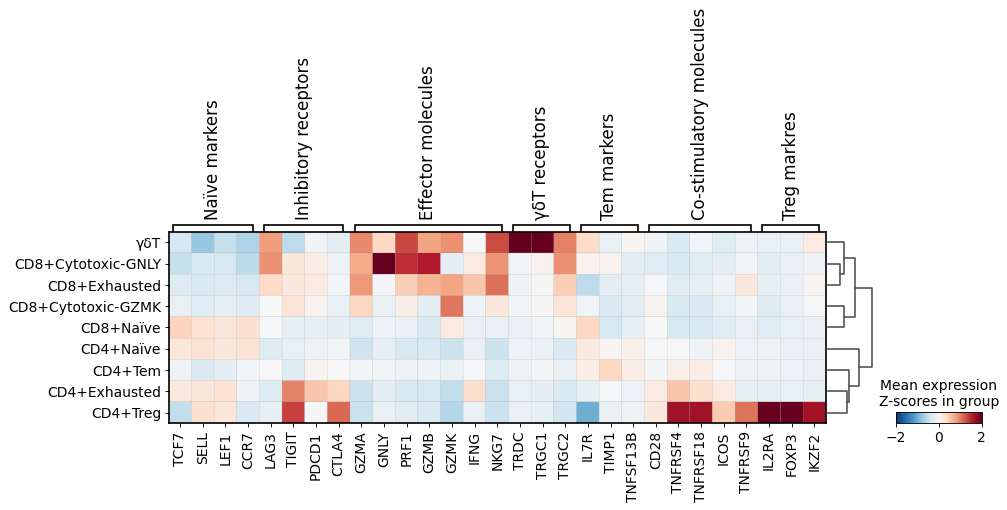

In [31]:
sc.settings.set_figure_params(dpi_save=600, facecolor='white',fontsize=15)
sc.pl.matrixplot(tcell[tcell.obs['tcell_subcluster']!='Unknown',:], functional_features, groupby='tcell_subcluster',log=False,vmin=-2,vmax=2,cmap = "RdBu_r",layer='scaled_counts',swap_axes =False,dendrogram=True,
                colorbar_title ='Mean expression\nZ-scores in group',save='tcellmarker.png')

In [80]:
save_file = './results/tcellsubcluster_luad.h5ad'
tcell.write_h5ad(save_file)

In [6]:
tcell = sc.read_h5ad('./results/tcellsubcluster_luad.h5ad')

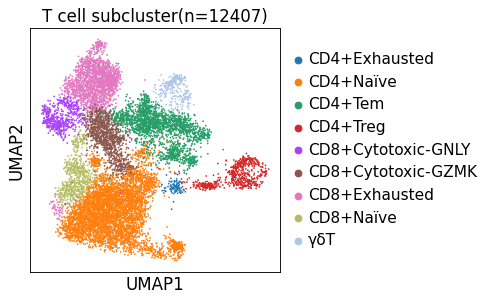

In [55]:
sc.pl.umap(tcell[tcell.obs['tcell_subcluster']!='Unknown',:],color=['tcell_subcluster'],use_raw=False,
          title = 'T cell subcluster(n=12407)',save='_TcellSubcluster.png')

In [64]:
tcell.obs['sample_id'].value_counts()

1476-ptc     6367
3731-ptc     5867
xjz17-ptc     144
3699-ptc       26
7734-ptc        3
Name: sample_id, dtype: int64

In [17]:
tcell_tmp = tcell[tcell.obs['tcell_subcluster']!='Unknown',:]

/home/yd/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [25]:
adata.obs['sample_id'].value_counts()

1476-ptc     18188
3731-ptc     13246
3699-ptc      8017
7734-ptc      7346
0129-ptc      6428
xjz17-ptc     5038
Name: sample_id, dtype: int64

In [17]:
 pd.crosstab(adata.obs['sample_id'],adata.obs['major_clusters'], normalize='index')*100

major_clusters     B cell  Dendritic cell  Epithelial cell  Fibroblast  \
sample_id                                                                
0129-ptc         0.015557        0.108899         3.515868    2.037959   
1476-ptc        13.750825        0.582802        43.842094    0.038487   
3699-ptc         0.748410        0.212049         1.247349    1.060247   
3731-ptc        18.277216        0.573758         2.068549    0.128341   
7734-ptc         0.068064        4.247209        24.843452    9.665124   
xjz17-ptc        2.421596        0.178642        25.188567    1.131401   

major_clusters  Mast cell     Mo/Mac    NK cell     T cell  
sample_id                                                   
0129-ptc         0.046671  94.135034   0.000000   0.140012  
1476-ptc         0.016494   1.786892   2.584121  37.398285  
3699-ptc         0.012473  94.723712   0.710989   1.284770  
3731-ptc         0.007549  16.367205  14.223162  48.354220  
7734-ptc         0.013613  60.495508   0.013613   0.653417  
xjz17-ptc        3.811036  62.048432   0.734418   4.485907

In [34]:
adata.uns['major_clusters_colors'].tolist()

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61']

In [31]:
adata.obs['major_clusters'].cat.categories

Index(['B cell', 'Dendritic cell', 'Epithelial cell', 'Fibroblast',
       'Mast cell', 'Mo/Mac', 'NK cell', 'T cell'],
      dtype='object')

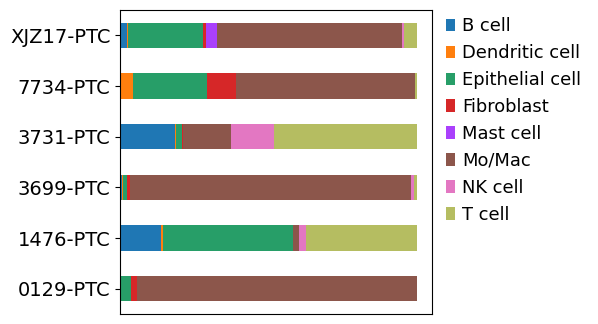

In [38]:
color =adata.uns['major_clusters_colors'].tolist()
tmp = pd.crosstab(adata.obs['sample_id'],adata.obs['major_clusters'], normalize='index')*100
ax = tmp.plot(stacked=True,color=color,kind='barh')
ax.grid(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=True,
    labelbottom=False, # labels along the bottom edge are off
    labelleft=True
)
ax.legend(loc='upper right', bbox_to_anchor= (1.5, 1), ncol=1,
            borderaxespad=0, frameon=False)
plt.yticks([5,4,3,2,1,0],['XJZ17-PTC','7734-PTC','3731-PTC','3699-PTC','1476-PTC','0129-PTC'])
plt.savefig('fig6-fraction.png',dpi=600,bbox_inches='tight')

In [9]:
adata.obs.to_csv('./all_cells_metadata.csv')

In [11]:
tcell.obs.to_csv('./tcell_metadata.csv')